In [44]:
from requests.compat import urlparse, urlunparse, urljoin
from bs4 import BeautifulSoup
import re
import requests
from requests import Session, request, get
import urllib.request
from urllib.request import urlopen
from urllib.error import URLError, HTTPError
import os
import pandas as pd
import numpy as np
from functools import reduce ## 추가 ##
import sqlite3
import tensorflow as tf
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

In [3]:
con = sqlite3.connect("./musinsa_style_review.db")

In [4]:
cur = con.cursor()

In [12]:
cur.executescript('''
    DROP VIEW IF EXISTS 스타일리뷰_001;
    CREATE VIEW 스타일리뷰_001 AS
    SELECT * FROM 스타일리뷰_EDA
    WHERE major_category = '001';
''')
con.commit()

In [13]:
cur.executescript('''
    DROP VIEW IF EXISTS 스타일리뷰_002;
    CREATE VIEW 스타일리뷰_002 AS
    SELECT * FROM 스타일리뷰_EDA
    WHERE major_category = '002';
    
    DROP VIEW IF EXISTS 스타일리뷰_003;
    CREATE VIEW 스타일리뷰_003 AS
    SELECT * FROM 스타일리뷰_EDA
    WHERE major_category = '003';
''')
con.commit()

In [24]:
style_001 = pd.read_csv('스타일리뷰_001.csv')
style_001

,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,947067,3851265,2019.02.07,https://image.msscdn.net/data/estimate/947067_...,NaN,NaN,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
1,947067,3855902,2019.02.08,https://image.msscdn.net/data/estimate/947067_...,NaN,NaN,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
2,947067,3860982,2019.02.08,https://image.msscdn.net/data/estimate/947067_...,NaN,NaN,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
3,947067,3863266,2019.02.09,https://image.msscdn.net/data/estimate/947067_...,NaN,NaN,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
4,947067,3899697,2019.02.12,https://image.msscdn.net/data/estimate/947067_...,NaN,NaN,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...
154540,1969029,28413840,2022.05.17,https://image.msscdn.net/data/estimate/1969029...,NaN,NaN,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...
154541,1969029,30514938,2022.07.19,https://image.msscdn.net/data/estimate/1969029...,NaN,NaN,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...
154542,1969029,33681548,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/1969029...,NaN,NaN,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...
154543,1969029,33789322,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/1969029...,NaN,NaN,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...


In [25]:
style_001.dropna(subset=["reviewImageUrl"], inplace=True)

In [26]:
style_001.reset_index(drop=True, inplace=True)

In [27]:
style_001.fillna(0.0, inplace=True)

In [28]:
style_001

,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,947067,3851265,2019.02.07,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
1,947067,3855902,2019.02.08,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
2,947067,3860982,2019.02.08,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
3,947067,3863266,2019.02.09,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
4,947067,3899697,2019.02.12,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...
154423,1969029,28413840,2022.05.17,https://image.msscdn.net/data/estimate/1969029...,0.0,0.0,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...
154424,1969029,30514938,2022.07.19,https://image.msscdn.net/data/estimate/1969029...,0.0,0.0,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...
154425,1969029,33681548,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/1969029...,0.0,0.0,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...
154426,1969029,33789322,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/1969029...,0.0,0.0,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...


In [29]:
style_001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154428 entries, 0 to 154427
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   goodsId          154428 non-null  int64  
 1   reviewId         154428 non-null  int64  
 2   reviewDate       154428 non-null  object 
 3   reviewImageUrl   154428 non-null  object 
 4   reviewRecomment  154428 non-null  object 
 5   label            154428 non-null  float64
 6   idx              154428 non-null  int64  
 7   major_category   154428 non-null  int64  
 8   mid_category     154428 non-null  int64  
 9   goods_id         154428 non-null  int64  
 10  goods_url        154428 non-null  object 
 11  goods_image      154428 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 14.1+ MB


In [32]:
style_002= pd.read_csv('스타일리뷰_002.csv')
style_002

,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,1173385,6698036,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,NaN,NaN,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
1,1173385,6698048,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,NaN,NaN,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
2,1173385,6698108,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,NaN,NaN,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
3,1173385,6699282,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,NaN,NaN,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
4,1173385,6737375,2019.12.05,https://image.msscdn.net/data/estimate/1173385...,NaN,NaN,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...
79591,2358360,27871430,2022.05.02,https://image.msscdn.net/data/estimate/2358360...,NaN,NaN,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79592,2358360,27871430,2022.05.02,https://image.msscdn.net/data/estimate/2358360...,NaN,NaN,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79593,2358360,28265512,2022.07.07,https://image.msscdn.net/data/estimate/2358360...,NaN,NaN,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79594,2358360,28277450,2022.05.13,https://image.msscdn.net/data/estimate/2358360...,안녕하세요. 패션을 사랑하는 무신사 CS입니다.정성스럽게 올려주신 소중한 후기 감사...,2.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...


In [33]:
style_002.dropna(subset=["reviewImageUrl"], inplace=True)

In [34]:
style_002.reset_index(drop=True, inplace=True)

In [35]:
style_002.fillna(0.0, inplace=True)

In [36]:
style_002

,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,1173385,6698036,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
1,1173385,6698048,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
2,1173385,6698108,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
3,1173385,6699282,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
4,1173385,6737375,2019.12.05,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...
79569,2358360,27871430,2022.05.02,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79570,2358360,27871430,2022.05.02,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79571,2358360,28265512,2022.07.07,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79572,2358360,28277450,2022.05.13,https://image.msscdn.net/data/estimate/2358360...,안녕하세요. 패션을 사랑하는 무신사 CS입니다.정성스럽게 올려주신 소중한 후기 감사...,2.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...


In [37]:
style_002.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79574 entries, 0 to 79573
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   goodsId          79574 non-null  int64  
 1   reviewId         79574 non-null  int64  
 2   reviewDate       79574 non-null  object 
 3   reviewImageUrl   79574 non-null  object 
 4   reviewRecomment  79574 non-null  object 
 5   label            79574 non-null  float64
 6   idx              79574 non-null  int64  
 7   major_category   79574 non-null  int64  
 8   mid_category     79574 non-null  int64  
 9   goods_id         79574 non-null  int64  
 10  goods_url        79574 non-null  object 
 11  goods_image      79574 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 7.3+ MB


In [39]:
style_003 = pd.read_csv('스타일리뷰_003.csv')
style_003

,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,957401,4458438,2019.04.10,https://image.msscdn.net/data/estimate/957401_...,NaN,NaN,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
1,957401,4458438,2019.04.10,https://image.msscdn.net/data/estimate/957401_...,NaN,NaN,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
2,957401,4511715,2019.04.16,https://image.msscdn.net/data/estimate/957401_...,NaN,NaN,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
3,957401,4511715,2019.04.16,https://image.msscdn.net/data/estimate/957401_...,NaN,NaN,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
4,957401,4665564,2019.05.01,https://image.msscdn.net/data/estimate/957401_...,NaN,NaN,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...
165411,1165926,30180427,2022.07.08,https://image.msscdn.net/data/estimate/1165926...,NaN,NaN,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...
165412,1165926,30180427,2022.07.08,https://image.msscdn.net/data/estimate/1165926...,NaN,NaN,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...
165413,1165926,30236026,2022.07.10,https://image.msscdn.net/data/estimate/1165926...,NaN,NaN,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...
165414,1165926,34233643,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/1165926...,NaN,NaN,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...


In [40]:
style_003.dropna(subset=["reviewImageUrl"], inplace=True)

In [41]:
style_003.reset_index(drop=True, inplace=True)

In [42]:
style_003.fillna(0.0, inplace=True)

In [43]:
style_003

,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,957401,4458438,2019.04.10,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
1,957401,4458438,2019.04.10,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
2,957401,4511715,2019.04.16,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
3,957401,4511715,2019.04.16,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
4,957401,4665564,2019.05.01,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...
165357,1165926,30180427,2022.07.08,https://image.msscdn.net/data/estimate/1165926...,0.0,0.0,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...
165358,1165926,30180427,2022.07.08,https://image.msscdn.net/data/estimate/1165926...,0.0,0.0,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...
165359,1165926,30236026,2022.07.10,https://image.msscdn.net/data/estimate/1165926...,0.0,0.0,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...
165360,1165926,34233643,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/1165926...,0.0,0.0,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...


In [44]:
style_003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165362 entries, 0 to 165361
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   goodsId          165362 non-null  int64  
 1   reviewId         165362 non-null  int64  
 2   reviewDate       165362 non-null  object 
 3   reviewImageUrl   165362 non-null  object 
 4   reviewRecomment  165362 non-null  object 
 5   label            165362 non-null  float64
 6   idx              165362 non-null  int64  
 7   major_category   165362 non-null  int64  
 8   mid_category     165362 non-null  int64  
 9   goods_id         165362 non-null  int64  
 10  goods_url        165362 non-null  object 
 11  goods_image      165362 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 15.1+ MB


In [45]:
style_001.to_csv("./스타일리뷰_001_결측제거.csv")

In [46]:
pd.read_csv("스타일리뷰_001_결측제거.csv")

,Unnamed: 0,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,0,947067,3851265,2019.02.07,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
1,1,947067,3855902,2019.02.08,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
2,2,947067,3860982,2019.02.08,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
3,3,947067,3863266,2019.02.09,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
4,4,947067,3899697,2019.02.12,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154423,154423,1969029,28413840,2022.05.17,https://image.msscdn.net/data/estimate/1969029...,0.0,0.0,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...
154424,154424,1969029,30514938,2022.07.19,https://image.msscdn.net/data/estimate/1969029...,0.0,0.0,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...
154425,154425,1969029,33681548,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/1969029...,0.0,0.0,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...
154426,154426,1969029,33789322,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/1969029...,0.0,0.0,7233,1,1011,1969029,https://www.musinsa.com/app/goods/1969029,https://image.msscdn.net/images/goods_img/2021...


In [47]:
style_002.to_csv("./스타일리뷰_002_결측제거.csv")

In [48]:
style_003.to_csv("./스타일리뷰_003_결측제거.csv")

In [49]:
pd.read_csv("스타일리뷰_002_결측제거.csv")

,Unnamed: 0,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,0,1173385,6698036,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
1,1,1173385,6698048,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
2,2,1173385,6698108,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
3,3,1173385,6699282,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
4,4,1173385,6737375,2019.12.05,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79569,79569,2358360,27871430,2022.05.02,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79570,79570,2358360,27871430,2022.05.02,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79571,79571,2358360,28265512,2022.07.07,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79572,79572,2358360,28277450,2022.05.13,https://image.msscdn.net/data/estimate/2358360...,안녕하세요. 패션을 사랑하는 무신사 CS입니다.정성스럽게 올려주신 소중한 후기 감사...,2.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...


In [50]:
pd.read_csv("스타일리뷰_003_결측제거.csv")

,Unnamed: 0,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,0,957401,4458438,2019.04.10,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
1,1,957401,4458438,2019.04.10,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
2,2,957401,4511715,2019.04.16,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
3,3,957401,4511715,2019.04.16,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
4,4,957401,4665564,2019.05.01,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165357,165357,1165926,30180427,2022.07.08,https://image.msscdn.net/data/estimate/1165926...,0.0,0.0,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...
165358,165358,1165926,30180427,2022.07.08,https://image.msscdn.net/data/estimate/1165926...,0.0,0.0,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...
165359,165359,1165926,30236026,2022.07.10,https://image.msscdn.net/data/estimate/1165926...,0.0,0.0,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...
165360,165360,1165926,34233643,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/1165926...,0.0,0.0,34153,3,3005,1165926,https://www.musinsa.com/app/goods/1165926,https://image.msscdn.net/images/goods_img/2019...


In [51]:
style_003_refined = pd.read_csv("스타일리뷰_003_결측제거.csv")

In [52]:
style_002_refined = pd.read_csv("스타일리뷰_002_결측제거.csv")

In [53]:
style_001_refined = pd.read_csv("스타일리뷰_001_결측제거.csv")

In [62]:
ProfileReport(style_003_refined).to_file('./style_003_refined.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\panda\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
ProfileReport(style_002_refined).to_file('./style_002_refined.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
ProfileReport(style_001_refined).to_file('./style_001_refined.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\panda\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
####################

In [66]:
style_001_refined["reviewId"].loc[(style_001_refined["label"] == 3.0)].tolist()

[20277450,
 22230525,
 22645244,
 17945191,
 21156971,
 26185606,
 26185606,
 22809307,
 32364895,
 32364895,
 24869278,
 22039870,
 23061537,
 21943183,
 23781900,
 17364654,
 23055630,
 20606642,
 22717835,
 26186015,
 20027188,
 21442014,
 20838118,
 21316594,
 21679892,
 20838721,
 21442915,
 22889749,
 32364941,
 32364941,
 21304706,
 20664351,
 20702546,
 23177335,
 23299090,
 22584516,
 22969064,
 23138232,
 28914235,
 23664722,
 23847159,
 21368602,
 21598836,
 16818614,
 24061112,
 22171426,
 24897857,
 20934716,
 21025360,
 24065199,
 24672149,
 27254361,
 20864372,
 24008540,
 22372180,
 26981595,
 21067656,
 21554291,
 24434984,
 22693521,
 30956017,
 22024031,
 22641408,
 25931549,
 21089924,
 19868220,
 27153127,
 28875936,
 18552391,
 26546629,
 26546691,
 27407795,
 22352002,
 24784696,
 28914282,
 32404217,
 23832564,
 26121320,
 22511541,
 25445077,
 23177276,
 21548441,
 21548441,
 26294328,
 28659625,
 20362122,
 20761233,
 20771350,
 21215263,
 21397576,
 22685789,

In [67]:
style_001_refined["goodsId"].loc[(style_001_refined["label"] == 3.0)].tolist()

[947067,
 947067,
 947067,
 1208839,
 1208839,
 1208839,
 1208839,
 897632,
 897632,
 897632,
 1557508,
 956939,
 2038497,
 1582356,
 836495,
 643173,
 643173,
 1160367,
 1336836,
 1336836,
 644037,
 644037,
 2085371,
 2085371,
 1755609,
 1126435,
 1126435,
 1126435,
 1126435,
 1126435,
 1563623,
 1557509,
 1557509,
 1557509,
 1817394,
 1642887,
 1642887,
 1642887,
 1642887,
 1759350,
 1759350,
 1563621,
 1563621,
 1571366,
 957879,
 947071,
 947071,
 1340997,
 1549285,
 1549285,
 1718760,
 2096929,
 1747034,
 1747034,
 1571348,
 620639,
 1679945,
 2188843,
 2188843,
 1642888,
 1119910,
 1628383,
 2163932,
 2354305,
 1782662,
 1725756,
 1139358,
 2090950,
 1860529,
 1756794,
 1756794,
 2096934,
 1126433,
 1842006,
 1642890,
 2151717,
 854396,
 1666078,
 2066781,
 2326810,
 2092964,
 1536399,
 1536399,
 1552302,
 1842003,
 659554,
 659554,
 659554,
 659554,
 659554,
 659554,
 659554,
 659554,
 1139175,
 1139175,
 1139175,
 1139175,
 1139175,
 1139175,
 1139175,
 1139175,
 1558847,
 1558

In [91]:
goods_with_label_001 = style_001_refined["goodsId"].loc[(style_001_refined["label"] == 1.0)|
                                                     (style_001_refined["label"] == 2.0)|(style_001_refined["label"] == 3.0)].tolist()

In [93]:
style_001_refined[style_001_refined["goodsId"].isin(goods_with_label_001)]

,Unnamed: 0,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,0,947067,3851265,2019.02.07,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
1,1,947067,3855902,2019.02.08,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
2,2,947067,3860982,2019.02.08,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
3,3,947067,3863266,2019.02.09,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
4,4,947067,3899697,2019.02.12,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154411,154411,2086661,32574136,2022.09.19,https://image.msscdn.net/data/estimate/2086661...,0.0,0.0,7232,1,1011,2086661,https://www.musinsa.com/app/goods/2086661,https://image.msscdn.net/images/goods_img/2021...
154412,154412,2086661,32666235,2022.09.21,https://image.msscdn.net/data/estimate/2086661...,0.0,0.0,7232,1,1011,2086661,https://www.musinsa.com/app/goods/2086661,https://image.msscdn.net/images/goods_img/2021...
154413,154413,2086661,32842694,2022.09.26,https://image.msscdn.net/data/estimate/2086661...,0.0,0.0,7232,1,1011,2086661,https://www.musinsa.com/app/goods/2086661,https://image.msscdn.net/images/goods_img/2021...
154414,154414,2086661,33199937,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/2086661...,0.0,0.0,7232,1,1011,2086661,https://www.musinsa.com/app/goods/2086661,https://image.msscdn.net/images/goods_img/2021...


In [94]:
goods_with_label_002 = style_002_refined["goodsId"].loc[(style_002_refined["label"] == 1.0)|
                                                     (style_002_refined["label"] == 2.0)|(style_002_refined["label"] == 3.0)].tolist()

In [95]:
style_002_refined[style_002_refined["goodsId"].isin(goods_with_label_002)]

,Unnamed: 0,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,0,1173385,6698036,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
1,1,1173385,6698048,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
2,2,1173385,6698108,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
3,3,1173385,6699282,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
4,4,1173385,6737375,2019.12.05,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,8100,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79569,79569,2358360,27871430,2022.05.02,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79570,79570,2358360,27871430,2022.05.02,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79571,79571,2358360,28265512,2022.07.07,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
79572,79572,2358360,28277450,2022.05.13,https://image.msscdn.net/data/estimate/2358360...,안녕하세요. 패션을 사랑하는 무신사 CS입니다.정성스럽게 올려주신 소중한 후기 감사...,2.0,27071,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...


In [96]:
goods_with_label_003 = style_003_refined["goodsId"].loc[(style_003_refined["label"] == 1.0)|
                                                     (style_003_refined["label"] == 2.0)|(style_003_refined["label"] == 3.0)].tolist()

In [97]:
style_003_refined[style_003_refined["goodsId"].isin(goods_with_label_003)]

,Unnamed: 0,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,idx,major_category,mid_category,goods_id,goods_url,goods_image
0,0,957401,4458438,2019.04.10,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
1,1,957401,4458438,2019.04.10,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
2,2,957401,4511715,2019.04.16,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
3,3,957401,4511715,2019.04.16,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
4,4,957401,4665564,2019.05.01,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,27900,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165345,165345,1772551,31397790,2022.08.17,https://image.msscdn.net/data/estimate/1772551...,0.0,0.0,34152,3,3005,1772551,https://www.musinsa.com/app/goods/1772551,https://image.msscdn.net/images/goods_img/2021...
165346,165346,1772551,31964025,2022.09.03,https://image.msscdn.net/data/estimate/1772551...,0.0,0.0,34152,3,3005,1772551,https://www.musinsa.com/app/goods/1772551,https://image.msscdn.net/images/goods_img/2021...
165347,165347,1772551,32175451,2022.09.08,https://image.msscdn.net/data/estimate/1772551...,0.0,0.0,34152,3,3005,1772551,https://www.musinsa.com/app/goods/1772551,https://image.msscdn.net/images/goods_img/2021...
165348,165348,1772551,32246508,2022.09.11,https://image.msscdn.net/data/estimate/1772551...,0.0,0.0,34152,3,3005,1772551,https://www.musinsa.com/app/goods/1772551,https://image.msscdn.net/images/goods_img/2021...


In [114]:
style_refined_001 = style_001_refined[style_001_refined["goodsId"].isin(goods_with_label_001)].drop(['Unnamed: 0', 'idx'], axis=1).reset_index(drop=True)

In [115]:
style_refined_002 = style_002_refined[style_002_refined["goodsId"].isin(goods_with_label_002)].drop(['Unnamed: 0', 'idx'], axis=1).reset_index(drop=True)

In [116]:
style_refined_003 = style_003_refined[style_003_refined["goodsId"].isin(goods_with_label_003)].drop(['Unnamed: 0', 'idx'], axis=1).reset_index(drop=True)

In [117]:
style_refined_001.to_csv("./스타일리뷰_001_라벨링된상품만.csv")

In [118]:
style_refined_002.to_csv("./스타일리뷰_002_라벨링된상품만.csv")

In [119]:
style_refined_003.to_csv("./스타일리뷰_003_라벨링된상품만..csv")

In [ ]:
### 여기서부터 ####

In [3]:
style_001 = pd.read_csv("스타일리뷰_001_라벨링된상품만.csv")

In [121]:
style_001

,Unnamed: 0,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,major_category,mid_category,goods_id,goods_url,goods_image
0,0,947067,3851265,2019.02.07,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
1,1,947067,3855902,2019.02.08,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
2,2,947067,3860982,2019.02.08,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
3,3,947067,3863266,2019.02.09,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
4,4,947067,3899697,2019.02.12,https://image.msscdn.net/data/estimate/947067_...,0.0,0.0,1,1005,947067,https://www.musinsa.com/app/goods/947067,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...
128800,128800,2086661,32574136,2022.09.19,https://image.msscdn.net/data/estimate/2086661...,0.0,0.0,1,1011,2086661,https://www.musinsa.com/app/goods/2086661,https://image.msscdn.net/images/goods_img/2021...
128801,128801,2086661,32666235,2022.09.21,https://image.msscdn.net/data/estimate/2086661...,0.0,0.0,1,1011,2086661,https://www.musinsa.com/app/goods/2086661,https://image.msscdn.net/images/goods_img/2021...
128802,128802,2086661,32842694,2022.09.26,https://image.msscdn.net/data/estimate/2086661...,0.0,0.0,1,1011,2086661,https://www.musinsa.com/app/goods/2086661,https://image.msscdn.net/images/goods_img/2021...
128803,128803,2086661,33199937,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/2086661...,0.0,0.0,1,1011,2086661,https://www.musinsa.com/app/goods/2086661,https://image.msscdn.net/images/goods_img/2021...


In [4]:
style_002 = pd.read_csv("스타일리뷰_002_라벨링된상품만.csv")

In [5]:
style_003 = pd.read_csv("스타일리뷰_003_라벨링된상품만.csv")

In [6]:
style_002

,Unnamed: 0,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,major_category,mid_category,goods_id,goods_url,goods_image
0,0,1173385,6698036,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
1,1,1173385,6698048,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
2,2,1173385,6698108,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
3,3,1173385,6699282,2019.10.16,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
4,4,1173385,6737375,2019.12.05,https://image.msscdn.net/data/estimate/1173385...,0.0,0.0,2,2012,1173385,https://www.musinsa.com/app/goods/1173385,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...
63967,63967,2358360,27871430,2022.05.02,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
63968,63968,2358360,27871430,2022.05.02,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
63969,63969,2358360,28265512,2022.07.07,https://image.msscdn.net/data/estimate/2358360...,0.0,0.0,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...
63970,63970,2358360,28277450,2022.05.13,https://image.msscdn.net/data/estimate/2358360...,안녕하세요. 패션을 사랑하는 무신사 CS입니다.정성스럽게 올려주신 소중한 후기 감사...,2.0,2,2021,2358360,https://www.musinsa.com/app/goods/2358360,https://image.msscdn.net/images/goods_img/2022...


In [7]:
style_003

,Unnamed: 0,goodsId,reviewId,reviewDate,reviewImageUrl,reviewRecomment,label,major_category,mid_category,goods_id,goods_url,goods_image
0,0,957401,4458438,2019.04.10,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
1,1,957401,4458438,2019.04.10,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
2,2,957401,4511715,2019.04.16,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
3,3,957401,4511715,2019.04.16,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
4,4,957401,4665564,2019.05.01,https://image.msscdn.net/data/estimate/957401_...,0.0,0.0,3,3007,957401,https://www.musinsa.com/app/goods/957401,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...
128655,128655,1772551,31397790,2022.08.17,https://image.msscdn.net/data/estimate/1772551...,0.0,0.0,3,3005,1772551,https://www.musinsa.com/app/goods/1772551,https://image.msscdn.net/images/goods_img/2021...
128656,128656,1772551,31964025,2022.09.03,https://image.msscdn.net/data/estimate/1772551...,0.0,0.0,3,3005,1772551,https://www.musinsa.com/app/goods/1772551,https://image.msscdn.net/images/goods_img/2021...
128657,128657,1772551,32175451,2022.09.08,https://image.msscdn.net/data/estimate/1772551...,0.0,0.0,3,3005,1772551,https://www.musinsa.com/app/goods/1772551,https://image.msscdn.net/images/goods_img/2021...
128658,128658,1772551,32246508,2022.09.11,https://image.msscdn.net/data/estimate/1772551...,0.0,0.0,3,3005,1772551,https://www.musinsa.com/app/goods/1772551,https://image.msscdn.net/images/goods_img/2021...


In [8]:
Url_Label_Whole_1 = list()
for v in range(len(style_001['label'])):
    Url_Label_element = (style_001["reviewImageUrl"][v], style_001["label"][v])
    Url_Label_Whole_1.append(Url_Label_element)

In [9]:
Url_Label_Zero_1 = list()
Url_Label_One_1 = list()
Url_Label_Two_1 = list()
Url_Label_Three_1 = list()
Url_Label_Four_1 = list()



for i in range(len(Url_Label_Whole_1)):
    if Url_Label_Whole_1[i][1] == 0.0:
        Url_Label_Zero_1.append(Url_Label_Whole_1[i])

    elif Url_Label_Whole_1[i][1] == 1.0:
        Url_Label_One_1.append(Url_Label_Whole_1[i])

    elif Url_Label_Whole_1[i][1] == 2.0:
        Url_Label_Two_1.append(Url_Label_Whole_1[i])

    elif Url_Label_Whole_1[i][1] == 3.0:
        Url_Label_Three_1.append(Url_Label_Whole_1[i])
  
    elif Url_Label_Whole_1[i][1] == 4.0:
        Url_Label_Four_1.append(Url_Label_Whole_1[i])

In [10]:
[len(Url_Label_Zero_1),len(Url_Label_One_1),len(Url_Label_Two_1),len(Url_Label_Three_1)], len(Url_Label_Four_1)

([107026, 921, 3953, 883], 16022)

In [11]:
Url_Label_Whole_2 = list()
for v in range(len(style_002['label'])):
    Url_Label_element = (style_002["reviewImageUrl"][v], style_002["label"][v])
    Url_Label_Whole_2.append(Url_Label_element)

In [12]:
Url_Label_Zero_2 = list()
Url_Label_One_2 = list()
Url_Label_Two_2 = list()
Url_Label_Three_2 = list()
Url_Label_Four_2 = list()



for i in range(len(Url_Label_Whole_2)):
    if Url_Label_Whole_2[i][1] == 0.0:
        Url_Label_Zero_2.append(Url_Label_Whole_2[i])

    elif Url_Label_Whole_2[i][1] == 1.0:
        Url_Label_One_2.append(Url_Label_Whole_2[i])

    elif Url_Label_Whole_2[i][1] == 2.0:
        Url_Label_Two_2.append(Url_Label_Whole_2[i])

    elif Url_Label_Whole_2[i][1] == 3.0:
        Url_Label_Three_2.append(Url_Label_Whole_2[i])
  
    elif Url_Label_Whole_2[i][1] == 4.0:
        Url_Label_Four_2.append(Url_Label_Whole_2[i])

In [13]:
Url_Label_Whole_3 = list()
for v in range(len(style_003['label'])):
    Url_Label_element = (style_003["reviewImageUrl"][v], style_003["label"][v])
    Url_Label_Whole_3.append(Url_Label_element)

In [14]:
Url_Label_Zero_3 = list()
Url_Label_One_3 = list()
Url_Label_Two_3 = list()
Url_Label_Three_3 = list()
Url_Label_Four_3 = list()



for i in range(len(Url_Label_Whole_3)):
    if Url_Label_Whole_3[i][1] == 0.0:
        Url_Label_Zero_3.append(Url_Label_Whole_3[i])

    elif Url_Label_Whole_3[i][1] == 1.0:
        Url_Label_One_3.append(Url_Label_Whole_3[i])

    elif Url_Label_Whole_3[i][1] == 2.0:
        Url_Label_Two_3.append(Url_Label_Whole_3[i])

    elif Url_Label_Whole_3[i][1] == 3.0:
        Url_Label_Three_3.append(Url_Label_Whole_3[i])
  
    elif Url_Label_Whole_3[i][1] == 4.0:
        Url_Label_Four_3.append(Url_Label_Whole_3[i])

In [15]:
X_zero_001 = list()
y_zero_001 = list()

for i in range(int(len(Url_Label_Zero_1)//5)):
    X_zero_001.append(Url_Label_Zero_1[i*5][0])
    y_zero_001.append(Url_Label_Zero_1[i*5][1])

In [16]:
X_zero_002 = list()
y_zero_002 = list()

for i in range(int(len(Url_Label_Zero_2)//5)):
    X_zero_002.append(Url_Label_Zero_2[i*5][0])
    y_zero_002.append(Url_Label_Zero_2[i*5][1])

In [17]:
X_zero_003 = list()
y_zero_003 = list()

for i in range(int(len(Url_Label_Zero_3)//5)):
    X_zero_003.append(Url_Label_Zero_3[i*5][0])
    y_zero_003.append(Url_Label_Zero_3[i*5][1])

In [18]:
X_one_001 = list()
y_one_001 = list()
for i in range(len(Url_Label_One_1)):
    X_one_001.append(Url_Label_One_1[i][0])
    y_one_001.append(Url_Label_One_1[i][1])

In [19]:
X_one_002 = list()
y_one_002 = list()
for i in range(len(Url_Label_One_2)):
    X_one_002.append(Url_Label_One_2[i][0])
    y_one_002.append(Url_Label_One_2[i][1])

In [20]:
X_one_003 = list()
y_one_003 = list()
for i in range(len(Url_Label_One_3)):
    X_one_003.append(Url_Label_One_3[i][0])
    y_one_003.append(Url_Label_One_3[i][1])

In [21]:
X_two_001 = list()
y_two_001 = list()
for i in range(len(Url_Label_Two_1)):
    X_two_001.append(Url_Label_Two_1[i][0])
    y_two_001.append(Url_Label_Two_1[i][1])

In [22]:
X_two_002 = list()
y_two_002 = list()
for i in range(len(Url_Label_Two_2)):
    X_two_002.append(Url_Label_Two_2[i][0])
    y_two_002.append(Url_Label_Two_2[i][1])

In [23]:
X_two_003 = list()
y_two_003 = list()
for i in range(len(Url_Label_Two_3)):
    X_two_003.append(Url_Label_Two_3[i][0])
    y_two_003.append(Url_Label_Two_3[i][1])

In [24]:
X_three_001 = list()
y_three_001 = list()
for i in range(len(Url_Label_Three_1)):
    X_three_001.append(Url_Label_Three_1[i][0])
    y_three_001.append(Url_Label_Three_1[i][1])

In [25]:
X_three_002 = list()
y_three_002 = list()
for i in range(len(Url_Label_Three_2)):
    X_three_002.append(Url_Label_Three_2[i][0])
    y_three_002.append(Url_Label_Three_2[i][1])

In [26]:
X_three_003 = list()
y_three_003 = list()
for i in range(len(Url_Label_Three_3)):
    X_three_003.append(Url_Label_Three_3[i][0])
    y_three_003.append(Url_Label_Three_3[i][1])

In [27]:
X_zero_001_train, X_zero_001_test, y_zero_001_train, y_zero_001_test = train_test_split(X_zero_001, y_zero_001, test_size=0.25, random_state=1)

In [28]:
X_zero_002_train, X_zero_002_test, y_zero_002_train, y_zero_002_test = train_test_split(X_zero_002, y_zero_002, test_size=0.25, random_state=1)

In [29]:
X_zero_003_train, X_zero_003_test, y_zero_003_train, y_zero_003_test = train_test_split(X_zero_003, y_zero_003, test_size=0.25, random_state=1)

In [30]:
X_one_train_001, X_one_test_001, y_one_train_001, y_one_test_001 = train_test_split(X_one_001, y_one_001, test_size=0.25, random_state=1)

In [31]:
X_one_train_002, X_one_test_002, y_one_train_002, y_one_test_002 = train_test_split(X_one_002, y_one_002, test_size=0.25, random_state=1)

In [32]:
X_one_train_003, X_one_test_003, y_one_train_003, y_one_test_003 = train_test_split(X_one_003, y_one_003, test_size=0.25, random_state=1)

In [33]:
X_two_train_001, X_two_test_001, y_two_train_001, y_two_test_001 = train_test_split(X_two_001, y_two_001, test_size=0.25, random_state=1)

In [34]:
X_two_train_002, X_two_test_002, y_two_train_002, y_two_test_002 = train_test_split(X_two_002, y_two_002, test_size=0.25, random_state=1)

In [35]:
X_two_train_003, X_two_test_003, y_two_train_003, y_two_test_003 = train_test_split(X_two_003, y_two_003, test_size=0.25, random_state=1)

In [36]:
X_three_train_001, X_three_test_001, y_three_train_001, y_three_test_001 = train_test_split(X_three_001, y_three_001, test_size=0.25, random_state=1)

In [37]:
X_three_train_002, X_three_test_002, y_three_train_002, y_three_test_002 = train_test_split(X_three_002, y_three_002, test_size=0.25, random_state=1)

In [38]:
X_three_train_003, X_three_test_003, y_three_train_003, y_three_test_003 = train_test_split(X_three_003, y_three_003, test_size=0.25, random_state=1)

In [178]:
os.makedirs("F:/1stProject/musinsa_review/img_saved", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/zero/001", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/zero/002", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/zero/003", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/one/001", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/one/002", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/one/003", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/two/001", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/two/002", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/two/003", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/three/001", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/three/002", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/train/three/003", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/zero/001", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/zero/002", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/zero/003", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/one/001", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/one/002", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/one/003", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/two/001", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/two/002", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/two/003", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/three/001", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/three/002", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/test/three/003", exist_ok=True)
os.makedirs("F:/1stProject/musinsa_review/img_saved/four", exist_ok=True)


base_dir = "F:/1stProject/musinsa_review/img_saved"
# train_dir = os.path.join(base_dir, 'train')
# train_zero_dir = os.path.join(train_dir, 'zero')
# train_one_dir = os.path.join(train_dir, 'one')
# train_two_dir = os.path.join(train_dir, 'two')
# train_three_dir = os.path.join(train_dir, 'three')

# test_dir = os.path.join(base_dir, 'test')
# test_zero_dir = os.path.join(test_dir, 'zero')
# test_one_dir = os.path.join(test_dir, 'one')
# test_two_dir = os.path.join(test_dir, 'two')
# test_three_dir = os.path.join(test_dir, 'three')

In [39]:
X_zero_001_train

['https://image.msscdn.net/data/estimate/2453556_0/gallery_62e40a9dcb875.jpg',
 'https://image.msscdn.net/data/estimate/890749_0/gallery_622c4c4851a54.jpg',
 'https://image.msscdn.net/data/estimate/1642903_0/gallery_623acf4a1bede.jpg',
 'https://image.msscdn.net/data/estimate/917937_0/gallery_6234921dbe0e6.jpg',
 'https://image.msscdn.net/data/estimate/1876645_0/gallery_627df1b030950.jpg',
 'https://image.msscdn.net/data/estimate/1417715_0/gallery_6329cf9514556.jpg',
 'https://image.msscdn.net/data/estimate/1094697_0/gallery_62ff614ca47ef.jpg',
 'https://image.msscdn.net/data/estimate/1322019_0/gallery_6329760f5b024.jpg',
 'https://image.msscdn.net/data/estimate/1710494_0/gallery_604601deb72a2.jpg',
 'https://image.msscdn.net/data/estimate/2396645_0/gallery_6233c35226b80.jpg',
 'https://image.msscdn.net/data/estimate/994588_0/gallery_634b642d19c88.jpg',
 'https://image.msscdn.net/data/estimate/1582356_0/gallery_63059aafe0543.jpg',
 'https://image.msscdn.net/data/estimate/1446291_0/gall

In [ ]:
3307 4460 7341 7511 10275 missing

In [42]:
len(X_zero_001_train), len(X_zero_002_train),len(X_zero_003_train),len(X_one_train_001),len(X_one_train_002),len(X_one_train_003),len(X_two_train_001), len(X_two_train_002),len(X_two_train_003),len(X_three_train_001),len(X_three_train_002),len(X_three_train_003)

(16053, 8121, 17292, 690, 238, 343, 2964, 1221, 1437, 662, 123, 363)

In [43]:
len(X_zero_001_test), len(X_zero_002_test),len(X_zero_003_test),len(X_one_test_001),len(X_one_test_002),len(X_one_test_003),len(X_two_test_001), len(X_two_test_002),len(X_two_test_003),len(X_three_test_001),len(X_three_test_002),len(X_three_test_003)

(5352, 2707, 5764, 231, 80, 115, 989, 407, 479, 221, 42, 122)

In [191]:
for i in range(len(X_zero_001_train[11493:])):
    urllib.request.urlretrieve(X_zero_001_train[11493:][i], "F:/1stProject/musinsa_review/img_saved/train/zero/001/{}_{}.jpg".format(i+11493, X_zero_001_train[11493:][i].split('/')[5]))
#     3307 4460 7341 7511 10275 missing

KeyboardInterrupt: 

In [219]:
for i in range(len(X_zero_001_train[:100])):
    urllib.request.urlretrieve(X_zero_001_train[:100][i], "F:/1stProject/musinsa_review/img_saved/train/zero/001/{}_{}.jpg".format(i, X_zero_001_train[:100][i].split('/')[5]))

In [194]:
for i in range(len(X_zero_002_train[:100])):
    urllib.request.urlretrieve(X_zero_002_train[:100][i], "F:/1stProject/musinsa_review/img_saved/train/zero/002/{}_{}.jpg".format(i, X_zero_002_train[:100][i].split('/')[5]))

In [195]:
for i in range(len(X_zero_003_train[:100])):
    urllib.request.urlretrieve(X_zero_003_train[:100][i], "F:/1stProject/musinsa_review/img_saved/train/zero/003/{}_{}.jpg".format(i, X_zero_003_train[:100][i].split('/')[5]))

In [196]:
for i in range(len(X_one_train_001[:100])):
    urllib.request.urlretrieve(X_one_train_001[:100][i], "F:/1stProject/musinsa_review/img_saved/train/one/001/{}_{}.jpg".format(i, X_one_train_001[:100][i].split('/')[5]))

In [197]:
for i in range(len(X_one_train_002[:100])):
    urllib.request.urlretrieve(X_one_train_002[:100][i], "F:/1stProject/musinsa_review/img_saved/train/one/002/{}_{}.jpg".format(i, X_one_train_002[:100][i].split('/')[5]))

In [199]:
for i in range(len(X_one_train_003[:100])):
    urllib.request.urlretrieve(X_one_train_003[:100][i], "F:/1stProject/musinsa_review/img_saved/train/one/003/{}_{}.jpg".format(i, X_one_train_003[:100][i].split('/')[5]))

In [200]:
for i in range(len(X_two_train_001[:100])):
    urllib.request.urlretrieve(X_two_train_001[:100][i], "F:/1stProject/musinsa_review/img_saved/train/two/001/{}_{}.jpg".format(i, X_two_train_001[:100][i].split('/')[5]))

In [201]:
for i in range(len(X_two_train_002[:100])):
    urllib.request.urlretrieve(X_two_train_002[:100][i], "F:/1stProject/musinsa_review/img_saved/train/two/002/{}_{}.jpg".format(i, X_two_train_002[:100][i].split('/')[5]))

In [202]:
for i in range(len(X_two_train_003[:100])):
    urllib.request.urlretrieve(X_two_train_003[:100][i], "F:/1stProject/musinsa_review/img_saved/train/two/003/{}_{}.jpg".format(i, X_two_train_003[:100][i].split('/')[5]))

In [203]:
for i in range(len(X_three_train_001[:100])):
    urllib.request.urlretrieve(X_three_train_001[:100][i], "F:/1stProject/musinsa_review/img_saved/train/three/001/{}_{}.jpg".format(i, X_three_train_001[:100][i].split('/')[5]))

In [204]:
for i in range(len(X_three_train_002[:100])):
    urllib.request.urlretrieve(X_three_train_002[:100][i], "F:/1stProject/musinsa_review/img_saved/train/three/002/{}_{}.jpg".format(i, X_three_train_002[:100][i].split('/')[5]))

In [205]:
for i in range(len(X_three_train_003[:100])):
    urllib.request.urlretrieve(X_three_train_003[:100][i], "F:/1stProject/musinsa_review/img_saved/train/three/003/{}_{}.jpg".format(i, X_three_train_003[:100][i].split('/')[5]))

In [206]:
for i in range(len(X_zero_001_test[:100])):
    urllib.request.urlretrieve(X_zero_001_test[:100][i], "F:/1stProject/musinsa_review/img_saved/test/zero/001/{}_{}.jpg".format(i, X_zero_001_test[:100][i].split('/')[5]))
#     3307 4460 7341 7511 10275 missing

In [207]:
for i in range(len(X_zero_002_test[:100])):
    urllib.request.urlretrieve(X_zero_002_test[:100][i], "F:/1stProject/musinsa_review/img_saved/test/zero/002/{}_{}.jpg".format(i, X_zero_002_test[:100][i].split('/')[5]))

In [208]:
for i in range(len(X_zero_003_test[:100])):
    urllib.request.urlretrieve(X_zero_003_test[:100][i], "F:/1stProject/musinsa_review/img_saved/test/zero/003/{}_{}.jpg".format(i, X_zero_003_test[:100][i].split('/')[5]))

In [209]:
for i in range(len(X_one_test_001[:100])):
    urllib.request.urlretrieve(X_one_test_001[:100][i], "F:/1stProject/musinsa_review/img_saved/test/one/001/{}_{}.jpg".format(i, X_one_test_001[:100][i].split('/')[5]))

In [210]:
for i in range(len(X_one_test_002[:100])):
    urllib.request.urlretrieve(X_one_test_002[:100][i], "F:/1stProject/musinsa_review/img_saved/test/one/002/{}_{}.jpg".format(i, X_one_test_002[:100][i].split('/')[5]))

In [211]:
for i in range(len(X_one_test_003[:100])):
    urllib.request.urlretrieve(X_one_test_003[:100][i], "F:/1stProject/musinsa_review/img_saved/test/one/003/{}_{}.jpg".format(i, X_one_test_003[:100][i].split('/')[5]))

In [212]:
for i in range(len(X_two_test_001[:100])):
    urllib.request.urlretrieve(X_two_test_001[:100][i], "F:/1stProject/musinsa_review/img_saved/test/two/001/{}_{}.jpg".format(i, X_two_test_001[:100][i].split('/')[5]))

In [213]:
for i in range(len(X_two_test_002[:100])):
    urllib.request.urlretrieve(X_two_test_002[:100][i], "F:/1stProject/musinsa_review/img_saved/test/two/002/{}_{}.jpg".format(i, X_two_test_002[:100][i].split('/')[5]))

In [214]:
for i in range(len(X_two_test_003[:100])):
    urllib.request.urlretrieve(X_two_test_003[:100][i], "F:/1stProject/musinsa_review/img_saved/test/two/003/{}_{}.jpg".format(i, X_two_test_003[:100][i].split('/')[5]))

In [215]:
for i in range(len(X_three_test_001[:100])):
    urllib.request.urlretrieve(X_three_test_001[:100][i], "F:/1stProject/musinsa_review/img_saved/test/three/001/{}_{}.jpg".format(i, X_three_test_001[:100][i].split('/')[5]))

In [216]:
for i in range(len(X_three_test_002[:100])):
    urllib.request.urlretrieve(X_three_test_002[:100][i], "F:/1stProject/musinsa_review/img_saved/test/three/002/{}_{}.jpg".format(i, X_three_test_002[:100][i].split('/')[5]))

In [217]:
for i in range(len(X_three_test_003[:100])):
    urllib.request.urlretrieve(X_three_test_003[:100][i], "F:/1stProject/musinsa_review/img_saved/test/three/003/{}_{}.jpg".format(i, X_three_test_003[:100][i].split('/')[5]))

In [ ]:

(16053, 8121, 17292, 690, 238, 343, 2964, 1221, 1437, 662, 123, 363)
(5352, 2707, 5764, 231, 80, 115, 989, 407, 479, 221, 42, 122)

In [45]:
for i in range(len(X_zero_001_train[2000:])): # 16053
        try:
            urllib.request.urlretrieve(X_zero_001_train[2000:][i], "F:/1stProject/musinsa_review/img_saved_2/001/train/zero/{}_{}.jpg".format(i+2000, X_zero_001_train[2000:][i].split('/')[5]))
        except HTTPError as e:
            err = e.read()
            print(e.getcode(), i+2000)

404 3307
404 4460
404 7341
404 7511
404 10275
404 11986
404 13496


In [221]:
for i in range(len(X_one_train_001)): # 690
    urllib.request.urlretrieve(X_one_train_001[i], "F:/1stProject/musinsa_review/img_saved_2/001/train/one/{}_{}.jpg".format(i, X_one_train_001[i].split('/')[5]))

In [46]:
for i in range(len(X_two_train_001[1500:])): # 2964
    try:
        urllib.request.urlretrieve(X_two_train_001[1500:][i], "F:/1stProject/musinsa_review/img_saved_2/001/train/two/{}_{}.jpg".format(i+1500, X_two_train_001[1500:][i].split('/')[5]))
    except HTTPError as e:
        err = e.read()
        print(e.getcode(), i+1500)

404 1619
404 2953


In [47]:
for i in range(len(X_zero_001_test[1000:])): # 5352
    try:
        urllib.request.urlretrieve(X_zero_001_test[1000:][i], "F:/1stProject/musinsa_review/img_saved_2/001/test/zero/{}_{}.jpg".format(i+1000, X_zero_001_test[1000:][i].split('/')[5]))
    except HTTPError as e:
        err = e.read()
        print(e.getcode(), i+1000)
    

404 2422


In [226]:
for i in range(len(X_one_test_001)): # 231
    urllib.request.urlretrieve(X_one_test_001[i], "F:/1stProject/musinsa_review/img_saved_2/001/test/one/{}_{}.jpg".format(i, X_one_test_001[i].split('/')[5]))

In [51]:
for i in range(len(X_two_test_001[282:])): # 989
    try:
        urllib.request.urlretrieve(X_two_test_001[282:][i], "F:/1stProject/musinsa_review/img_saved_2/001/test/two/{}_{}.jpg".format(i+282, X_two_test_001[282:][i].split('/')[5]))
    except HTTPError as e:
        err = e.read()
        print(e.getcode(), i+282)

404 282
404 616


In [ ]:
(16053, 8121, 17292, 690, 238, 343, 2964, 1221, 1437, 662, 123, 363)
(5352, 2707, 5764, 231, 80, 115, 989, 407, 479, 221, 42, 122)

In [52]:
for i in range(len(X_zero_002_train[2000:])): # 8121
    try:
        urllib.request.urlretrieve(X_zero_002_train[2000:][i], "F:/1stProject/musinsa_review/img_saved_2/002/train/zero/{}_{}.jpg".format(i+2000, X_zero_002_train[2000:][i].split('/')[5]))
    except HTTPError as e:
        err = e.read()
        print(e.getcode(), i+2000)
    # 1305 missing

404 3596
404 3716


In [230]:
for i in range(len(X_one_train_002)): # 238
    urllib.request.urlretrieve(X_one_train_002[i], "F:/1stProject/musinsa_review/img_saved_2/002/train/one/{}_{}.jpg".format(i, X_one_train_002[i].split('/')[5]))

In [231]:
for i in range(len(X_two_train_002)): # 1221
    urllib.request.urlretrieve(X_two_train_002[i], "F:/1stProject/musinsa_review/img_saved_2/002/train/two/{}_{}.jpg".format(i, X_two_train_002[i].split('/')[5]))

In [53]:
for i in range(len(X_zero_002_test[1490:])): # 2707
    try:
        urllib.request.urlretrieve(X_zero_002_test[1490:][i], "F:/1stProject/musinsa_review/img_saved_2/002/test/zero/{}_{}.jpg".format(i+1490, X_zero_002_test[1490:]
[i].split('/')[5]))
    except HTTPError as e:
        err = e.read()
        print(e.getcode(), i+1490)
    # 310, 1035 missing / stopped until 1489

In [235]:
for i in range(len(X_one_test_002)): # 80
    urllib.request.urlretrieve(X_one_test_002[i], "F:/1stProject/musinsa_review/img_saved_2/002/test/one/{}_{}.jpg".format(i, X_one_test_002[i].split('/')[5]))

In [236]:
for i in range(len(X_two_test_002)): # 407
    urllib.request.urlretrieve(X_two_test_002[i], "F:/1stProject/musinsa_review/img_saved_2/002/test/two/{}_{}.jpg".format(i, X_two_test_002[i].split('/')[5]))

In [ ]:
(16053, 8121, 17292, 690, 238, 343, 2964, 1221, 1437, 662, 123, 363)
(5352, 2707, 5764, 231, 80, 115, 989, 407, 479, 221, 42, 122)

In [54]:
for i in range(len(X_zero_003_train[2000:])): # 17292
    try:
        urllib.request.urlretrieve(X_zero_003_train[2000:][i], "F:/1stProject/musinsa_review/img_saved_2/003/train/zero/{}_{}.jpg".format(i+2000, X_zero_003_train[2000:][i].split('/')[5]))
    except HTTPError as e:
        err = e.read()
        print(e.getcode(), i+2000)        

404 8915
404 13634


In [245]:
for i in range(len(X_one_train_003)): # 343
    urllib.request.urlretrieve(X_one_train_003[i], "F:/1stProject/musinsa_review/img_saved_2/003/train/one/{}_{}.jpg".format(i, X_one_train_003[i].split('/')[5]))

In [246]:
for i in range(len(X_two_train_003)): # 1437
    urllib.request.urlretrieve(X_two_train_003[i], "F:/1stProject/musinsa_review/img_saved_2/003/train/two/{}_{}.jpg".format(i, X_two_train_003[i].split('/')[5]))

In [55]:
for i in range(len(X_zero_003_test[1057:])): # 5764
    try:
        urllib.request.urlretrieve(X_zero_003_test[1057:][i], "F:/1stProject/musinsa_review/img_saved_2/003/test/zero/{}_{}.jpg".format(i+1057, X_zero_003_test[1057:][i].split('/')[5]))
    except HTTPError as e:
        err = e.read()
        print(e.getcode(), i+1057)  
    # stopped until 1056

In [248]:
for i in range(len(X_one_test_003)): # 115
    urllib.request.urlretrieve(X_one_test_003[i], "F:/1stProject/musinsa_review/img_saved_2/003/test/one/{}_{}.jpg".format(i, X_one_test_003[i].split('/')[5]))

In [249]:
for i in range(len(X_two_test_003)): # 479
    urllib.request.urlretrieve(X_two_test_003[i], "F:/1stProject/musinsa_review/img_saved_2/003/test/two/{}_{}.jpg".format(i, X_two_test_003[i].split('/')[5]))

In [ ]:
### 연습 ### 

In [237]:
X_one_train_001.frame

AttributeError: 'list' object has no attribute 'frame'

In [238]:
from sklearn.datasets import load_digits

In [239]:
data = load_digits(as_frame=True)

In [240]:
type(data)

sklearn.utils.Bunch

In [243]:
data.frame

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [19]:
from tensorflow.keras.preprocessing import image

In [26]:
images = image.load_img('F:\\1stProject\\musinsa_review\\img_saved_2\\001\\train\\one\\*.jpg')

OSError: [Errno 22] Invalid argument: 'F:\\1stProject\\musinsa_review\\img_saved_2\\001\\train\\one\\*.jpg'

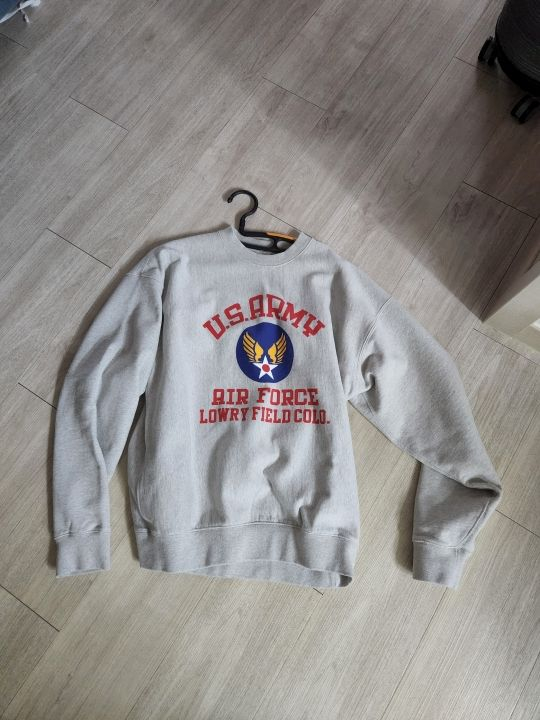

In [25]:
images

In [252]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pathlib

In [15]:
data_dir = pathlib.Path('F:\1stProject\musinsa_review\img_saved_2\001\train\one')

In [18]:
list(data_dir.glob('*.jpg'))

[]

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
# import os
from tensorflow.keras import layers
from tensorflow.keras import Model
# from tensorflow.keras.applications.inception_v3 import InceptionV3

import tensorflow.keras.applications.mobilenet_v3 

In [ ]:
local_zip = '/content/drive/MyDrive/002.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/') # tmp 폴더에 저장 
zip_ref.close()

In [ ]:
categ = '002' # 대분류 코드 

# train set image
normal_dir = os.path.join('/tmp/' + categ + '/train/zero')
label1_dir = os.path.join('/tmp/' + categ + '/train/one')
label2_dir = os.path.join('/tmp/' + categ + '/train/two')

# test set image 
normal_test_dir = os.path.join('/tmp/' + categ + '/test/zero')
label1_test_dir = os.path.join('/tmp/' + categ + '/test/one')
label2_test_dir = os.path.join('/tmp/' + categ + '/test/two')

# train set image list
normal_files = os.listdir(normal_dir)
label1_files = os.listdir(label1_dir)
label2_files = os.listdir(label2_dir)

# test set image list
normal_t_files = os.listdir(normal_test_dir)
label1_t_files = os.listdir(label1_test_dir)
label2_t_files = os.listdir(label2_test_dir)

# train, test image number 
print('Total number of normal train images:', len(normal_files))
print('Total number of label1 train images:', len(label1_files))
print('Total number of label2 train images:', len(label2_files))
print('Total train image:',len(normal_files) + len(label1_files) + len(label2_files))
print('Total number of normal test images:', len(normal_t_files))
print('Total number of label1 test images:', len(label1_t_files))
print('Total number of label2 test images:', len(label2_t_files))
print("Total test image: ", len(normal_t_files) + len(label1_t_files) + len(label2_t_files))


In [ ]:
%matplotlib inline

pic_index = 12 # 어디부터 

next_normal = [os.path.join(normal_dir, fname) for fname in normal_files[pic_index-10:pic_index]]
next_label1 = [os.path.join(label1_dir, fname) for fname in label1_files[pic_index-10:pic_index]]
next_label2 = [os.path.join(label2_dir, fname) for fname in label2_files[pic_index-10:pic_index]]

# 예시 이미지 데이터 보기 
for i, img_path in enumerate(next_normal + next_label1 + next_label2):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  # plt.axis('Off')
  plt.show()

In [ ]:
# 이미지 크기, Batch 크기 지정 
IMAGE_SIZE = 100
BATCH_SIZE = 10
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3) #

spe = len(normal_files) + len(label1_files) + len(label2_files)//BATCH_SIZE # steps_per_epoch
vsp = len(normal_t_files) + len(label1_t_files) + len(label2_t_files)//BATCH_SIZE # validation_steps

# training image dir
TRAINING_DIR = "/tmp/" + categ +"/train/"

training_datagen = ImageDataGenerator(
    rescale = 1./255, # tensor로 어떻게 쪼갤 것인지 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest') # 정확한 분류을 위해서 이미지의 변형을 해서 train 

# validation image dir

VALIDATION_DIR = "/tmp/" + categ +"/test/"

validation_datagen = ImageDataGenerator(rescale = 1./255) # tensor로 어떻게 쪼갤 것인지, train와 동일해야함 

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE)


model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 100x100 with 3 bytes color
  # This is the first convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=IMG_SHAPE),
  tf.keras.layers.MaxPooling2D(2, 2),
  # The second convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The third convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The fourth convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])


# Create the base model from the pre-trained MobileNet V2
# base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                                               include_top=False, 
#                                               weights='imagenet')
# base_model.trainable = False

# model = tf.keras.Sequential([
#   base_model,
#   tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.GlobalAveragePooling2D(),
#   tf.keras.layers.Dense(units=5, activation='softmax')
# ])

model.summary()


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from google.colab import files
# from keras.preprocessing import image

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=load_img(path, target_size=(100, 100))

  x=img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=BATCH_SIZE)

  # print(classes[0])

  if classes[0][0] > classes[0][1] and classes[0][0] > classes[0][2]:
      print("zero")
      break
  elif classes[0][1] > classes[0][2] and classes[0][1] > classes[0][0]:
      print("one")
      break
  else:
      print("two")
      break

In [ ]:
image_batch, label_batch = next(val_generator)
image_batch.shape, label_batch.shape

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('musinsa.txt', 'w') as f:
  f.write(labels)

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(units=5, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator), 
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
# from tensorflow.keras.applications.inception_v3 import InceptionV3

# from tensorflow.keras.applications.mobilenet_v3 import mobilenet_v3


local_weights_file = '/content/rps.h5'

# pre_trained_model = mob(input_shape=(150, 150, 3),
#                               include_top=False,
#                               weights=None)

pre_trained_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(150, 150, 3),
    # alpha=1.0, 
    minimalistic=False,
    include_top=False,
    weights=None,
    input_tensor=None,
    classes=3,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)


pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()